# practice for corpus workshop
## Jeremy Fahringer

based on [Summer School of Linguistics 2016 - python for linguists workshops](https://github.com/dlukes/ssol/blob/master/notebooks/day4.ipynb)

In [1]:
import nltk
# this imports the `regex` library and renames it to `re` for convenience
# (it's less typing)
import regex as re

%matplotlib notebook

# an interactive Regex tester

In [2]:
import IPython.core.display as ipd
import ipywidgets as ipw

@ipw.interact(regex=ipw.Text(), string=ipw.Textarea())
def findall(DOTALL=False, MULTILINE=False, IGNORECASE=False, only_first=False, regex="", string=""):
    if not (regex and string):
        ipd.display(ipd.HTML(""))
        return None
    flags = 0
    if DOTALL:
        flags |= re.DOTALL
    if MULTILINE:
        flags |= re.MULTILINE
    if IGNORECASE:
        flags |= re.IGNORECASE
    start = '<span style="background-color: gold">'
    end = "</span>"
    offset_bump = len(start) + len(end)
    offset = 0
    html = string
    matches = []
    for m in re.finditer(regex, string, flags):
        matches.append(m.captures()[0])
        span = m.span()
        sstart, send = span[0] + offset, span[1] + offset
        html = html[:sstart] + start + html[sstart:send] + end + html[send:]
        offset += offset_bump
        if only_first:
            break
    ipd.display(ipd.HTML("<p>regex: <strong>" + regex + "</strong></p>" + "<pre>" + html + "</pre"))
    return matches

interactive(children=(Checkbox(value=False, description='DOTALL'), Checkbox(value=False, description='MULTILIN…

# getting data into Python

In [3]:
tweets = nltk.corpus.PlaintextCorpusReader("./corpusdata/tweets_sample/", ["tweets_2017-06-01-00_en_textonly.txt"])

In [4]:
tweets.fileids()

['tweets_2017-06-01-00_en_textonly.txt']

In [5]:
tweets.words('tweets_2017-06-01-00_en_textonly.txt')

['text', 'I', "'", 'm', 'so', 'lost', 'RT', '@', ...]

In [6]:
tweets

<PlaintextCorpusReader in '/Users/jfahringer/dev_projects/notebooks/corpusdata/tweets_sample'>

In [7]:
# tweets.raw()

In [8]:
# add nltk word_tokenize dependency
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jfahringer/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
tweets_tokens = nltk.word_tokenize(tweets.raw()) ## fails on tweet data?

In [10]:
tweets_tokens[:30]

['text',
 'I',
 "'m",
 'so',
 'lost',
 'RT',
 '@',
 'allkpop',
 ':',
 'Jun.K',
 'is',
 'a',
 'hot',
 'professor',
 'in',
 'final',
 "'",
 '6',
 'Nights',
 "'",
 'concert',
 'individual',
 'teaser␤https',
 ':',
 '//t.co/DHFpBVpko8',
 'https',
 ':',
 '//t.co/PCKHeoa0jF',
 'Now',
 'those']

In [11]:
tweets_text = nltk.Text(tweets_tokens)

<IPython.core.display.Javascript object>


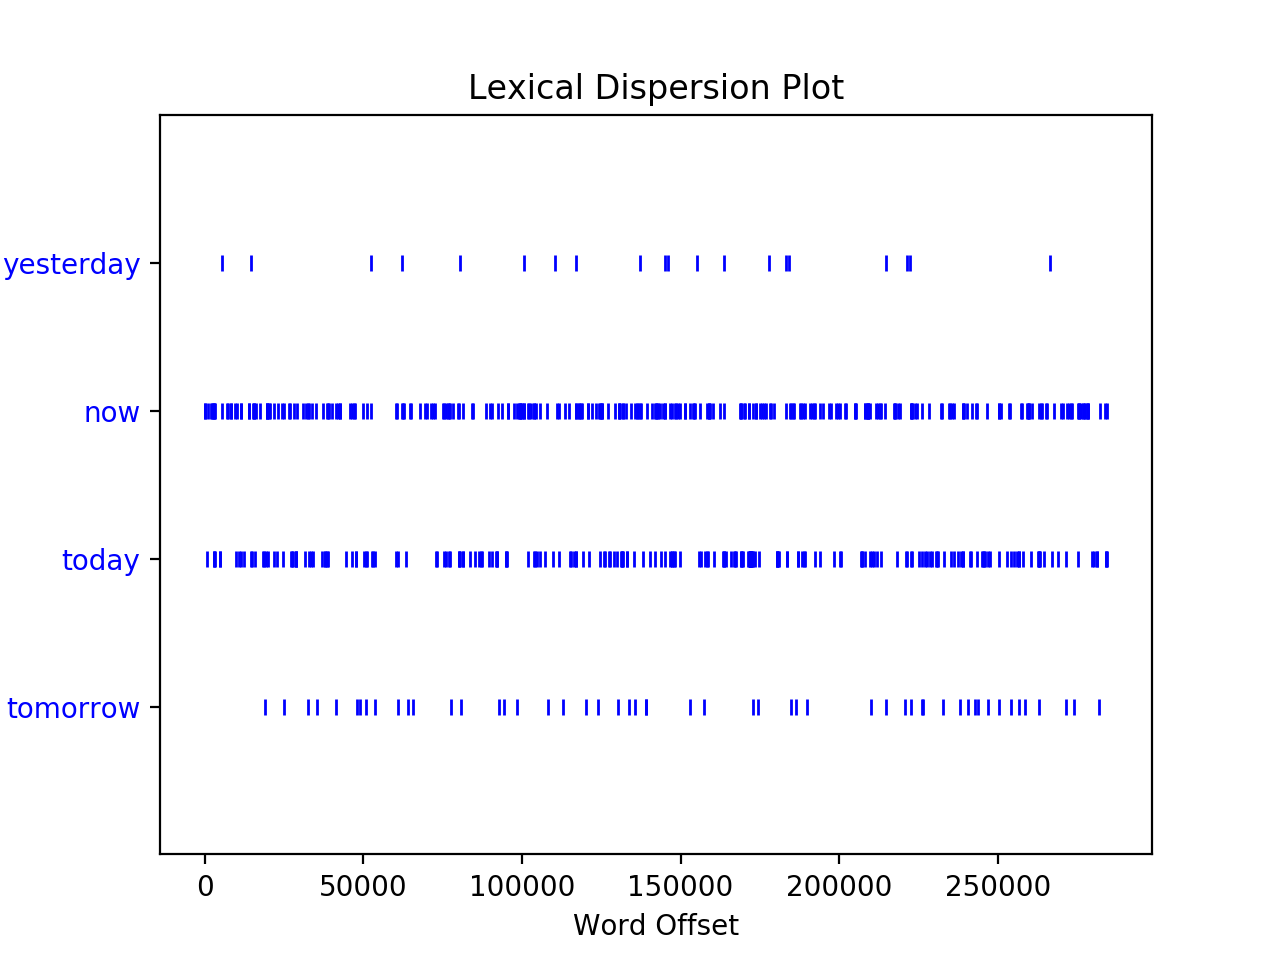

In [12]:
tweets_text.dispersion_plot(["yesterday","now","today","tomorrow"])


In [13]:
# add nltk pos_tag dependency
nltk.download('averaged_perceptron_tagger')

tweets_tagged = nltk.pos_tag(tweets_tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jfahringer/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [14]:
tweets_tagged[0:30]

[('text', 'NN'),
 ('I', 'PRP'),
 ("'m", 'VBP'),
 ('so', 'RB'),
 ('lost', 'VBN'),
 ('RT', 'NNP'),
 ('@', 'NNP'),
 ('allkpop', 'NN'),
 (':', ':'),
 ('Jun.K', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('hot', 'JJ'),
 ('professor', 'NN'),
 ('in', 'IN'),
 ('final', 'JJ'),
 ("'", 'POS'),
 ('6', 'CD'),
 ('Nights', 'NNS'),
 ("'", 'POS'),
 ('concert', 'NN'),
 ('individual', 'JJ'),
 ('teaser␤https', 'NN'),
 (':', ':'),
 ('//t.co/DHFpBVpko8', 'JJ'),
 ('https', 'NN'),
 (':', ':'),
 ('//t.co/PCKHeoa0jF', 'NN'),
 ('Now', 'RB'),
 ('those', 'DT')]

In [15]:
tweets_text.concordance("today")

Displaying 25 of 278 matches:
 RT @ Evan_McMullin : In their op-ed today , McMaster/Cohn reveal their adoptio
y stepdad found out my hidden talent today https : //t.co/0aicjn5Fqe RT @ teamf
... deadline for voting is noon ET , today : … My first ever concert in my almo
y stepdad found out my hidden talent today https : //t.co/0aicjn5Fqe RT @ Wonde
 the Q & amp ; A in Dublin , Ireland today . # IlluminateTourDublin https : //t
rilliant blue necklace ! Order yours today ! # summer jewelry # beach bling # h
 Bunduh9 Took* 😂 RT @ autismspeaks : Today is the last day to tweet using # WC4
e and Kids https : //t.co/MGIyerQ8RT Today , we are unveiling the layout design
eanthus97 Will be thinking about you today . Stay safe . Xx RT @ HRZ1003 : Big 
g is going to be alright , maybe not today , but eventually . Most commonly mis
y stepdad found out my hidden talent today https : //t.co/0aicjn5Fqe RT @ anees
BAWorcester Architecture Awards from today . Submit here : … https : //t.co/oe2
 in Oct 20